# GE 2.8-127 AMR-Wind turbine checkout

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot    as plt
import amrwind_frontend as amrwind

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the amrwind_frontend app 
tutorial1 = amrwind.MyApp.init_nogui()

## Set up the simulation type and properties

In [3]:
WS     = 9      # Uniform wind speed, m/s
rotorD = 127    # Rotor diameter, m
rotorx = 0
rotory = 0

In [4]:
# Create the working directory and switch to it
workingdir='AMRWIND_ADM_NREL2p8_WS%0.1f'%WS
try:
    os.mkdir(workingdir)
except:
    pass
os.chdir(workingdir)

## Set basic AMR-Wind parameters

In [5]:
tutorial1.setAMRWindInput('time_control',   ['const dt'])
tutorial1.setAMRWindInput('time.stop_time', 360)
tutorial1.setAMRWindInput('time.fixed_dt',  0.1)
tutorial1.setAMRWindInput('incflo.physics', ['FreeStream', 'Actuator'])

In [6]:
tutorial1.setAMRWindInput('ConstValue.density.value',  1.0)
tutorial1.setAMRWindInput('ConstValue.velocity.value', [WS, 0.0, 0.0])
tutorial1.setAMRWindInput('incflo.velocity',           [WS, 0.0, 0.0])
tutorial1.setAMRWindInput('turbulence.model',          ['Laminar'])

In [7]:
tutorial1.setAMRWindInput('geometry.prob_lo', [-2560, -960, -960])
tutorial1.setAMRWindInput('geometry.prob_hi', [ 2560,  960,  960])
tutorial1.setAMRWindInput('amr.n_cell',       [ 256, 96, 96])

### Set the BC's

In [8]:
tutorial1.setAMRWindInput('is_periodicx', False)
tutorial1.setAMRWindInput('is_periodicy', True)
tutorial1.setAMRWindInput('is_periodicz', True)

In [9]:
tutorial1.setAMRWindInput('xlo.type', 'mass_inflow')
tutorial1.setAMRWindInput('xhi.type', 'pressure_outflow')
tutorial1.setAMRWindInput('xlo.density', 1.0)
tutorial1.setAMRWindInput('xlo.velocity', [WS, 0.0, 0.0])

## Plot the domain

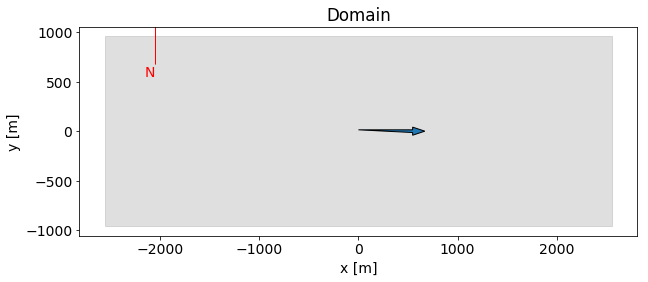

In [10]:
# Plot the domain
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
tutorial1.plotDomain(ax=ax)

## Adding the GE 2.8-127 turbine

In [11]:
tutorial1.setAMRWindInput('ICNS.source_terms', ['ActuatorForcing'])

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [12]:
# Get a copy the default dictionary which defines AMR-Wind turbines
turbine = tutorial1.get_default_actuatordict()

# Set some basic properties of the turbine, like the name and position
turbine['Actuator_name']          = 'turbine0'
turbine['Actuator_base_position'] = [rotorx, rotory, -90]
turbine['Actuator_yaw']           = 270.0
turbine['Actuator_density']       = 1.0

In [13]:
turbine = tutorial1.turbinemodels_applyturbinemodel(turbine, 'NREL 2.8-127 ADM', docopy=True, updatefast=True) 

turbine['Actuator_epsilon']       = [3.0, 3.0, 3.0]
turbine['Actuator_epsilon_tower'] = [3.0, 3.0, 3.0]

# Add the turbine to the simulation.
tutorial1.add_turbine(turbine, verbose=True)

docopy = True from /projects/wind_uq/lcheung/amrwind-frontend/turbines/OpenFAST_NREL2p8-127 to turbine0_OpenFAST_NREL2p8-127
turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127.fst
/gpfs/lcheung/tmp/createdocs/amrwind-frontend/docs/casestudies/NREL_2p8_127/AMRWIND_ADM_NREL2p8_WS9.0/turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127_AeroDyn15.dat
Actuator_name: 'turbine0'
use_turbine_type: ''
copy_turb_files: 1
edit_fast_files: 1
Actuator_type: 'TurbineFastDisk'
Actuator_openfast_input_file: 'turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127.fst'
Actuator_base_position: [0, 0, -90]
Actuator_rotor_diameter: 127.0
Actuator_hub_height: 90.0
Actuator_num_points_blade: 64
Actuator_num_points_tower: 12
Actuator_epsilon: [3.0, 3.0, 3.0]
Actuator_epsilon_tower: [3.0, 3.0, 3.0]
Actuator_openfast_start_time: 0.0
Actuator_openfast_stop_time: 1000.0
Actuator_nacelle_drag_coeff: 0.0
Actuator_nacelle_area: 0.0
Actuator_yaw: 270.0
Actuator_output_frequency: 10
Actuator_density: 1.0
Actuator_sample_yaw: None
Actuator_diameter

       1.0 AirDens - Air density (kg/m^3) [EDITED]


In [14]:
# Print out the dictionary
for k, g in turbine.items(): print('%s: %s'%(k, repr(g)))

Actuator_name: 'turbine0'
use_turbine_type: ''
copy_turb_files: 1
edit_fast_files: 1
Actuator_type: 'TurbineFastDisk'
Actuator_openfast_input_file: 'turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127.fst'
Actuator_base_position: [0, 0, -90]
Actuator_rotor_diameter: 127.0
Actuator_hub_height: 90.0
Actuator_num_points_blade: 64
Actuator_num_points_tower: 12
Actuator_epsilon: [3.0, 3.0, 3.0]
Actuator_epsilon_tower: [3.0, 3.0, 3.0]
Actuator_openfast_start_time: 0.0
Actuator_openfast_stop_time: 1000.0
Actuator_nacelle_drag_coeff: 0.0
Actuator_nacelle_area: 0.0
Actuator_yaw: 270.0
Actuator_output_frequency: 10
Actuator_density: 1.0
Actuator_sample_yaw: None
Actuator_diameters_to_sample: None
Actuator_num_force_points: None
Actuator_num_vel_points_r: None
Actuator_num_vel_points_t: None
Actuator_thrust_coeff: 'None'
Actuator_wind_speed: 'None'


## Add refinement zones

In [15]:
tutorial1.setAMRWindInput('amr.max_level', 3)

In [16]:
# Get the default dictionary for refinement window
refinewin0 = tutorial1.get_default_taggingdict()

# Edit the parameters of the refinement window
refinewin0['tagging_name']         = 'box0'
refinewin0['tagging_shapes']       = 'box0'
refinewin0['tagging_type']         = 'GeometryRefinement'
refinewin0['tagging_level']        = 0
refinewin0['tagging_geom_type']    = 'box'
refinewin0['tagging_geom_origin']  = [rotorx-10*rotorD, rotory-2*rotorD, -2*rotorD]
refinewin0['tagging_geom_xaxis']   = [20*rotorD, 0, 0]
refinewin0['tagging_geom_yaxis']   = [0, 4*rotorD, 0]
refinewin0['tagging_geom_zaxis']   = [0, 0, 4*rotorD]

# Add refinement zone to simulation.
tutorial1.add_tagging(refinewin0)

In [17]:
# Get the default dictionary for refinement window
refinewin1 = tutorial1.get_default_taggingdict()

# Edit the parameters of the refinement window
refinewin1['tagging_name']         = 'box1'
refinewin1['tagging_shapes']       = 'box1'
refinewin1['tagging_type']         = 'GeometryRefinement'
refinewin1['tagging_level']        = 1
refinewin1['tagging_geom_type']    = 'box'
refinewin1['tagging_geom_origin']  = [rotorx-3*rotorD, rotory-1*rotorD, -1.2*rotorD]
refinewin1['tagging_geom_xaxis']   = [5*rotorD, 0, 0]
refinewin1['tagging_geom_yaxis']   = [0, 2*rotorD, 0]
refinewin1['tagging_geom_zaxis']   = [0, 0, 2.4*rotorD]

# Add refinement zone to simulation.
tutorial1.add_tagging(refinewin1)

In [18]:
# Get the default dictionary for refinement window
refinewin2 = tutorial1.get_default_taggingdict()

# Edit the parameters of the refinement window
refinewin2['tagging_name']         = 'box2'
refinewin2['tagging_shapes']       = 'box2'
refinewin2['tagging_type']         = 'GeometryRefinement'
refinewin2['tagging_level']        = 2
refinewin2['tagging_geom_type']    = 'box'
refinewin2['tagging_geom_origin']  = [rotorx-2*rotorD, rotory-0.75*rotorD, -0.8*rotorD]
refinewin2['tagging_geom_xaxis']   = [3.25*rotorD, 0, 0]
refinewin2['tagging_geom_yaxis']   = [0, 1.5*rotorD, 0]
refinewin2['tagging_geom_zaxis']   = [0, 0, 1.6*rotorD]

# Add refinement zone to simulation.
tutorial1.add_tagging(refinewin2)

Plotting turbines


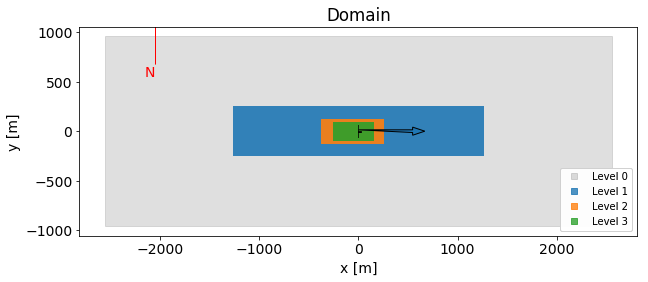

In [19]:
# Create a figure and axes to plot domain
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')

# Set additional items to plot
#tutorial1.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['xyplane']
tutorial1.popup_storteddata['plotdomain']['plot_turbines']        = ['turbine0']
tutorial1.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box0','box1','box2']

# Plot the figure 
tutorial1.plotDomain(ax=ax)

## Add sampling planes

In [20]:
tutorial1.setAMRWindInput('incflo.post_processing',    ['sampling'])
tutorial1.setAMRWindInput('sampling.output_frequency', 100)
tutorial1.setAMRWindInput('sampling.fields',           ['velocity'])

In [21]:
# Get the default dictionary for sampling probes
sampleplane = tutorial1.get_default_samplingdict()

# Modify the geometry
sampleplane['sampling_name'] = 'hhplane1'
sampleplane['sampling_type'] = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [129, 49]
sampleplane['sampling_p_origin']     = [-2560.0, -960.0, 0.0]
sampleplane['sampling_p_axis1']      = [5120.0, 0.0, 0.0]
sampleplane['sampling_p_axis2']      = [0.0, 1920.0, 0.0]

# Add sampling plane to simuation
tutorial1.add_sampling(sampleplane)

In [22]:
# Get the default dictionary for sampling probes
sampleplane = tutorial1.get_default_samplingdict()

# Modify the geometry
sampleplane['sampling_name'] = 'hhplane2'
sampleplane['sampling_type'] = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [349, 117]
sampleplane['sampling_p_origin']     = [-1160.0, -580.0, 0.0]
sampleplane['sampling_p_axis1']      = [3480.0, 0.0, 0.0]
sampleplane['sampling_p_axis2']      = [0.0, 1160.0, 0.0]

# Add sampling plane to simuation
tutorial1.add_sampling(sampleplane)

In [23]:
# Get the default dictionary for sampling probes
sampleplane = tutorial1.get_default_samplingdict()

# Modify the geometry
sampleplane['sampling_name'] = 'xzplane1'
sampleplane['sampling_type'] = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [349, 65]
sampleplane['sampling_p_origin']     = [-1160.0, 0.0, -320.0]
sampleplane['sampling_p_axis1']      = [3480.0, 0.0, 0.0]
sampleplane['sampling_p_axis2']      = [0.0, 0.0, 640.0]

# Add sampling plane to simuation
tutorial1.add_sampling(sampleplane)

Plotting turbines


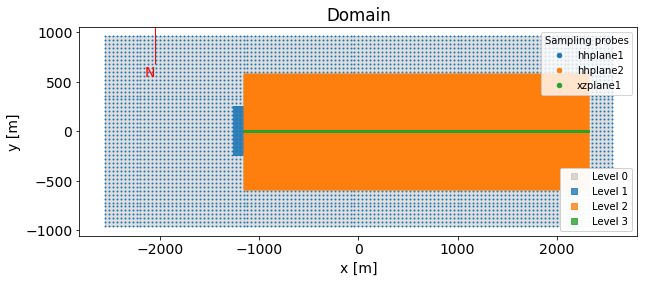

In [24]:
# Create a figure and axes to plot domain
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')

# Set additional items to plot
tutorial1.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['hhplane1', 'hhplane2', 'xzplane1']
#tutorial1.popup_storteddata['plotdomain']['plot_turbines']        = ['turbine0']
tutorial1.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box0','box1','box2']

# Plot the figure 
tutorial1.plotDomain(ax=ax)

In [25]:
# Validate the inputs
checkoutput=tutorial1.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 3 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ PASS] Actuator FST:turbine0 [turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127.fst] exists
[ PASS] Actuator FST:turbine0 CompInflow OK
[ PASS] Actuator FST:turbine0 [turbine0_OpenFAST_NREL2p8-127/NREL-2p8-127_AeroDyn15.dat] exists
[ PASS] Actuator FST:turbine0 WakeMod=0 OK
[ PASS] Actuator FST:turbine0 AirDens=1.000000, matches incflo.density=1.000000
[ PASS] Sampling probes:hhplane1 
[ PASS] Sampling probes:hhplane2 
[ PASS] Sampling probes:xzplane1 

Results: 
 11 PASS
 0 SKIP
 0 FAIL
 0 WARN


In [26]:
# Estimate the mesh size of the grid
tutorial1.estimateMeshSize()

Refinement box0: level 1: 655482 cells
Refinement box1: level 2: 393289 cells
Refinement box2: level 3: 1022552 cells
ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0      2359296             20.0 x 20.0 x 20.0
       1       655482             10.0 x 10.0 x 10.0
       2       393289                5.0 x 5.0 x 5.0
       3      1022552                2.5 x 2.5 x 2.5
  TOTAL:      4430619


In [27]:
outstr=tutorial1.writeAMRWindInput('nrel-2p8-uniform.inp')
print(outstr)

# --- Simulation time control parameters ---
time.stop_time                           = 360.0               # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.1                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
incflo.physics                           = FreeStream Actuator # List of physics models to include in simulation.
incflo.verbose                           = 0                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = ppm                 
turbulence.model                         = Laminar             
incflo.gravity                           = 0.0 0.0 -9.81       # Gravitational acceleration vector (x,y,z) [m/s^2]
incflo.density                           = 1.0                 # Fluid density [kg/m^3]
transport.viscosity 